In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
y_test

In [ ]:
x_train[0]

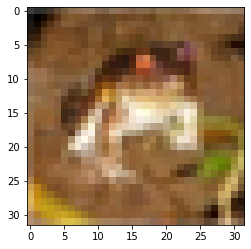

In [4]:
import matplotlib.pyplot as plt #파이썬 시각화 라이브러리 matplotlib을 import

digit = x_train[0]

# plt.imshow(digit, cmap=plt.cm.binary) #해당 이미지를 시각화 한다. #cmap은 color map으로 색을 지정한다.
plt.imshow(digit, cmap=plt.cm.Blues) 
plt.show() #이미지 출력

In [5]:
# Sequential 모델로 짠 코드

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
                    Dense(200, activation = 'relu', input_shape=(32,32, 3)),
                    Flatten(),
                    Dense(150, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 함수형 API로 짠 코드

from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32, 32, 3))

x = Dense(units = 200, activation = 'relu')(input_layer)
x = Flatten()(x)


x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_2 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


In [7]:
#모델 컴파일
# 손실함수와 옵티마이저 설정

from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )


In [8]:
#모델 훈련(데이터 전송)

model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 25s 501us/step - loss: 1.6743 - accuracy: 0.4152
Epoch 2/10
50000/50000 [==============================] - 23s 465us/step - loss: 1.4468 - accuracy: 0.4915
Epoch 3/10
50000/50000 [==============================] - 23s 465us/step - loss: 1.3736 - accuracy: 0.5175
Epoch 4/10
50000/50000 [==============================] - 23s 465us/step - loss: 1.3159 - accuracy: 0.5388
Epoch 5/10
50000/50000 [==============================] - 23s 465us/step - loss: 1.2665 - accuracy: 0.5569
Epoch 6/10
50000/50000 [==============================] - 23s 467us/step - loss: 1.2273 - accuracy: 0.5693
Epoch 7/10
50000/50000 [==============================] - 23s 463us/step - loss: 1.1855 - accuracy: 0.5856
Epoch 8/10
50000/50000 [==============================] - 24s 474us/step - loss: 1.1501 - accuracy: 0.5974
Epoch 9/10
50000/50000 [==============================] - 23s 465us/step - loss: 1.1143 - accuracy: 0.6099
Epoch 10/10
50000/50000 [============

In [9]:
#모델 평가
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 138us/step


[1.391506397819519, 0.5216000080108643]

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog','horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

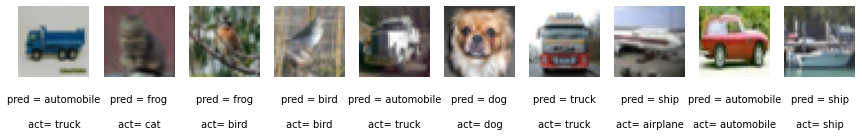

In [27]:
#실제 이미지와 비교
import matplotlib.pyplot as plt

n_to_show = 10
idx = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

for i, x in enumerate(idx):
  img = x_test[x]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[x]), fontsize = 10, ha = 'center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act= ' + str(actual_single[x]), fontsize=10, ha='center', transform= ax.transAxes)
  ax.imshow(img)


In [ ]:
#CNN 

